# Import the libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Load the dataset

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_total = np.concatenate((x_train, x_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

X_df = pd.DataFrame(X_total.reshape(X_total.shape[0], -1))
y_df = pd.DataFrame(y_total, columns=['label'])

print("Dataframe shape:", X_df.shape)
print("Labels dataframe shape:", y_df.shape)

Dataframe shape: (70000, 784)
Labels dataframe shape: (70000, 1)


# EDA and sample images

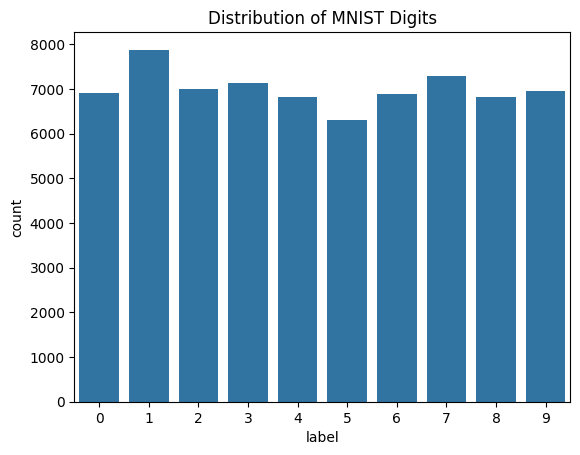

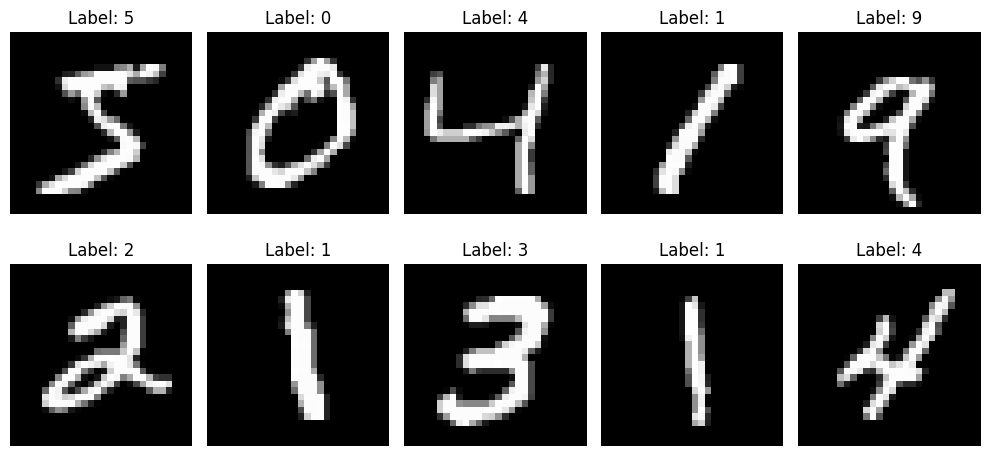

In [6]:
sns.countplot(x=y_df['label'])
plt.title("Distribution of MNIST Digits")
plt.show()

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_total[i], cmap='gray')
    plt.title("Label: {}".format(y_total[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Data preprocessing and train - test split 

In [7]:

X_total = X_total.reshape(X_total.shape[0], 28, 28, 1)

X_total = X_total / 255.0

y_total_cat = tf.keras.utils.to_categorical(y_total, num_classes=10)

X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X_total, y_total_cat, test_size=0.2, random_state=42)

# Build the model

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Compile the model

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Fit the model

In [10]:
history = model.fit(
    X_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)
history

Epoch 1/5
1750/1750 [==============================] - 17s 5ms/step - loss: 0.2093 - accuracy: 0.9358 - val_loss: 0.0642 - val_accuracy: 0.9793
Epoch 2/5
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0792 - accuracy: 0.9760 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 3/5
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0582 - accuracy: 0.9826 - val_loss: 0.0364 - val_accuracy: 0.9882
Epoch 4/5
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0378 - val_accuracy: 0.9889
Epoch 5/5
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0327 - val_accuracy: 0.9896


# Evaluate on test data

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test accuracy:", test_acc)

438/438 [==============================] - 2s 3ms/step - loss: 0.0327 - accuracy: 0.9896
Test accuracy: 0.9895714521408081


# Prediction and confuison matrix

438/438 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1343
           1       1.00      0.99      1.00      1600
           2       0.98      0.99      0.99      1380
           3       0.99      0.99      0.99      1433
           4       0.99      0.98      0.99      1295
           5       0.99      0.99      0.99      1273
           6       1.00      0.99      0.99      1396
           7       0.99      0.99      0.99      1503
           8       0.98      0.99      0.98      1357
           9       0.98      0.99      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



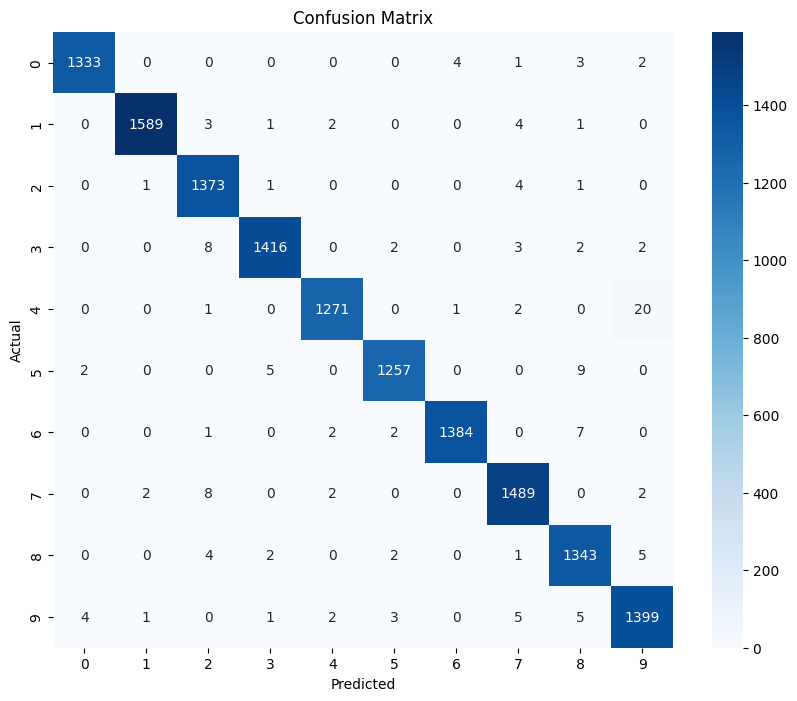

In [12]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print(classification_report(y_true, y_pred))

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy plot and Loss plot

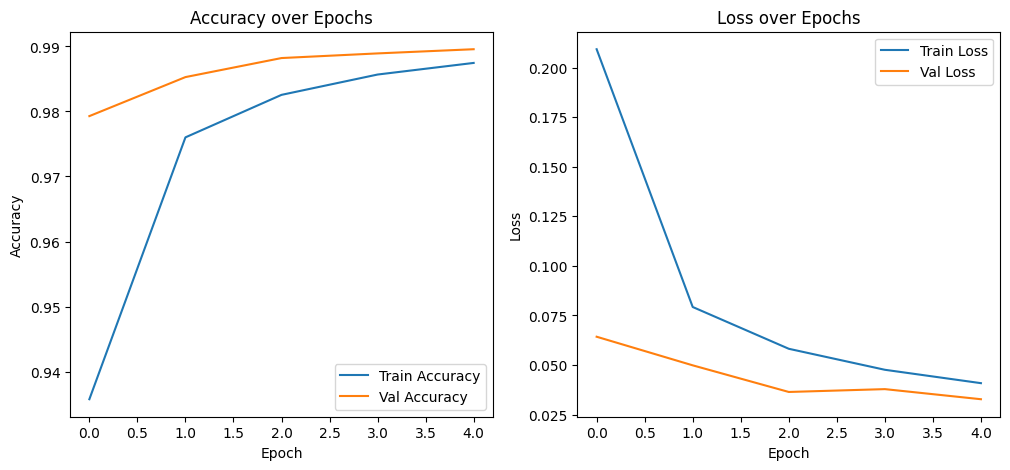

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Final prediction and output 

1/1 [==============================] - 0s 92ms/step


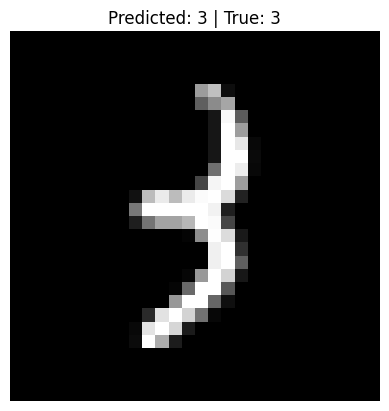

In [14]:
index = np.random.randint(0, X_test.shape[0])
img = X_test[index]
true_label = np.argmax(y_test_cat[index])

img_reshaped = img.reshape(1,28,28,1)

prediction = model.predict(img_reshaped)
predicted_label = np.argmax(prediction)

plt.imshow(img.reshape(28,28), cmap='gray')
plt.title("Predicted: {} | True: {}".format(predicted_label, true_label))
plt.axis('off')
plt.show()